In [33]:
import numpy as np
from os import listdir
import os.path as osp
import pandas as pd

path = "data/register.xls"
labels = pd.read_excel(path)
labels

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
0,CG009,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,C
1,CG011,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
2,CG013,男,国外,外国語がうまくなる方法について,中国語,2年未満,上級,A,A
3,CG015,男,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
4,CG017,女,国外,外国語がうまくなる方法について,中国語,2年未満,中級,B,A
...,...,...,...,...,...,...,...,...,...
299,KN303,女,国内,外国語がうまくなる方法について,韓国語,2年未満,中級,X,X
300,KN307,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
301,KN312,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
302,KN313,男,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X


In [34]:
import numpy as np
label1 = labels.loc[labels.作文テーマ == "外国語がうまくなる方法について",:]
label1

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
0,CG009,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,C
1,CG011,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
2,CG013,男,国外,外国語がうまくなる方法について,中国語,2年未満,上級,A,A
3,CG015,男,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
4,CG017,女,国外,外国語がうまくなる方法について,中国語,2年未満,中級,B,A
...,...,...,...,...,...,...,...,...,...
299,KN303,女,国内,外国語がうまくなる方法について,韓国語,2年未満,中級,X,X
300,KN307,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
301,KN312,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
302,KN313,男,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X


In [35]:
label2 = labels.loc[labels.作文テーマ == "インターネット時代に新聞や雑誌は必要か",:]
label2

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
76,CG101,男,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
77,CG102,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
78,CG103,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
79,CG104,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
80,CG105,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,上級,X,X
...,...,...,...,...,...,...,...,...,...
292,KG151,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,5年以上,上級,X,X
293,KG152,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年以上5年未満,上級,X,X
294,KG153,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年以上5年未満,上級,X,X
295,KG154,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年未満,中級,X,X


In [36]:
level1 = np.array(label1.日本語レベル)
level1, len(level1)

(array(['初級', '初級', '上級', '初級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '上級', '中級', '中級', '中級', '初級', '中級', '上級', '初級', '初級', '中級', '中級',
        '初級', '中級', '中級', '上級', '中級', '中級', '初級', '上級', '上級', '初級', '中級',
        '中級', '上級', '中級', '中級', '初級', '初級', '中級', '上級', '中級', '上級', '中級',
        '上級', '中級', '初級', '中級', '中級', '初級', '上級', '初級', '中級', '中級', '上級',
        '初級', '初級', '上級', '上級', '中級', '中級', '中級', '上級', '中級', '中級', '上級',
        '中級', '中級', '中級', '初級', '中級', '初級', '中級', '中級', '上級', '上級', '初級',
        '上級', '中級', '中級', '上級', '中級', '中級', '中級', '中級', '中級', '中級', '中級',
        '中級', '中級', '上級', '中級', '中級', '初級', '上級', '上級', '上級', '上級', '上級',
        '中級', '中級', '中級', '中級', '初級', '中級', '中級', '初級', '中級', '中級', '中級',
        '上級', '中級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '中級', '中級',
        '上級', '中級', '上級', '上級', '中級', '上級', '上級', '中級', '中級', '初級', '中級',
        '中級', '上級', '中級', '上級', '上級', '上級', '中級', '上級', '中級', '上級', '上級',
        '上級', '中級', '初級', '中級', '中級', 

In [37]:
level2 = np.array(label2.日本語レベル)
level2, len(level2)

(array(['中級', '中級', '中級', '中級', '上級', '中級', '中級', '中級', '上級', '中級', '中級',
        '中級', '中級', '上級', '上級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '中級', '上級', '中級', '中級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '上級', '中級', '中級', '中級', '中級', '中級', '中級', '中級', '上級', '中級', '中級',
        '中級', '中級', '上級', '中級', '中級', '上級', '中級', '中級', '中級', '上級', '中級',
        '上級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '中級', '上級', '上級',
        '中級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級',
        '中級', '上級'], dtype=object),
 112)

In [27]:
from os import listdir
txt_path = "data/txt/"
txt_topics = listdir(txt_path)

txt_gaigo_path = txt_path + txt_topics[0]
txt_internet_path = txt_path + txt_topics[1]

txt_gaigo_files = listdir(txt_gaigo_path)
txt_internet_files = listdir(txt_internet_path)

In [31]:
# import os.path as osp
# import re
# gaigo_files = [f for f in listdir(osp.join(txt_path, txt_topics[0])) if f.endswith('.txt')]
# gaigo = []
# for gaigo_file in gaigo_files:
#     # print(gaigo_file)
#     with open(osp.join(txt_path, txt_topics[0], gaigo_file), "r", encoding="utf-8") as f:
#         lines = f.read()
#         # type(lines)
#         lines = re.sub('\n', '', lines)
#         lines = re.sub('\u3000', '', lines)
#     gaigo.append(lines)
# # type(gaigo[0])
# # gaigo[0][0]

import os.path as osp
import re
gaigo_files = [f for f in listdir(osp.join(txt_path, txt_topics[0])) if f.endswith('.txt')]
gaigo = []
for gaigo_file in gaigo_files:
    # print(gaigo_file)
    with open(osp.join(txt_path, txt_topics[0], gaigo_file), "r", encoding="utf-8") as f:
        lines = f.read()
        # type(lines)
        lines = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", lines)
        lines = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", lines)

    gaigo.append(lines)
# type(gaigo[0])
gaigo[0]

# 注意。注釈は削除していない。

'私は大学日本語科の一年生です最初日本語が難しいと思いましたそれから先生が日本語がうまくなる方法を聞きました先生は毎日単語を覚えるとか日本語の文章を読むとかドラマをみますと言いました私は先生が教えたとおりにしていました毎朝単語を読んでいましたよるドラマを見ていました難しい内容をあった先生に聞きました重要な内容を整理しました日本語の口頭試験がよいためにたくさん練習しましたたくさんの日本の歌を聞きました歌を聞きながら歌の内容を書きましたいま私は日本語がやさしいと思います'

In [32]:
# import re
# internet_files = [f for f in listdir(osp.join(txt_path, txt_topics[1])) if f.endswith('.txt')]
# internet = []
# for internet_file in internet_files:
#     with open(osp.join(txt_path, txt_topics[1], internet_file), "r", encoding="utf-8") as f:
#         lines = f.read()
#         # print(lines)
#         lines = lines.strip('\ufeff□')
#         lines = re.sub('■', '', lines)
#         lines = re.sub('\n', '', lines)
#         lines = re.sub('□', '', lines)
#         lines = re.sub('\u3000', '', lines)
        
#     internet.append(lines)

# internet[0]

import re
internet_files = [f for f in listdir(osp.join(txt_path, txt_topics[1])) if f.endswith('.txt')]
internet = []
for internet_file in internet_files:
    with open(osp.join(txt_path, txt_topics[1], internet_file), "r", encoding="utf-8") as f:
        lines = f.read()
        # print(lines)
        lines = lines.strip('\ufeff□')
        lines = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", lines)
        lines = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", lines)
        
    internet.append(lines)

internet[0]

'この数十年の間にテレビや携帯電話などの便利なものは世界的に使われていて私たち現代人の生活に大きな役に立っているのだその何種類の産品の中に一番の便利さが持っていて生活を影響するのはコンピューターだと思う今は何でもコンピューターでできるんでしょう例えばネットを使ってどの国にどんなことがあったかのがすぐ分かることとかネットで買い物したりホテルを予約したりすることとかいろいろなことがただ指で完成できるその一方でコンピューターの発達によってたくさん問題も次から次へと生じるずっとコンピューターで宿題やレポートをすると今の子たちはほとんど字がきたなくなったり書けない漢字も昔より増えてきたらしいだからうまくコンピューターを利用できるかどうかは私たちにとって重要な課題になるさっき言ったようにネットでどんなことでもできるもちろん毎日のニュースや雑誌の内容もほとんどネットにあるそのためコンビニに行って新聞と雑誌を買う必要がなくなりコンピューターの電源のボタンを押すと何でも見られる新聞代や雑誌代を使って他方面のことで使うことができるようになったからコンピューターがあれば他のものはもういらないと思っている人が多いかも知れないけれども私はそのようには思わないコンピューターの利点はたくさんあるのは確かだけれどその利点や便利さを頼りすぎると悪い結果も出て来る漢字が正しく書けなくなったり何でもネットからコピーして自分がどんどん考えられなくなったりするのは一番見られる現象であるですからいくらコンピューターが便利でも他のところから知識とか生活能力を学習するのは昔より重要だと思っているもちろん新聞や雑誌はそれらの方法の中に一番簡単に使える方法であるこれからも必要なものとして私たちの生活に存在しているのも違えない要するにこれからきっとたくさん生活に役に立つものが創造されるんだだけどいくら生活がどんなに快適便利になっても自分の目で見て手を使って自分らしく考えておいてそしてやることをするのが依然としてもっとも人間にとって大切なことであると私はそうだと思っている 携は右側の部分の上に山'

In [44]:
from collections import defaultdict as dd
text_tagged = dd(list)
for level, txt in zip(level1, internet):
    text_tagged[level].append(txt)

for level, txt in zip(level2, gaigo):
    text_tagged[level].append(txt)

text_tagged_dict = dict(text_tagged)
# text_tagged

In [ ]:
import pickle 
# with open('text_tagged_dict2.pickle', 'wb') as f:
#     pickle.dump(text_tagged_dict, f)
    
text_tagged_dict2 = pickle.load(open('text_tagged_dict2.pickle', 'rb'))
text_tagged_dict2

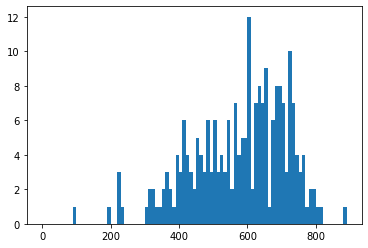

In [55]:
import matplotlib.pyplot as plt
import numpy as np

text_length_dist = [len(text) for level in text_tagged_dict2.keys() for text in text_tagged_dict2[level]]
# [len(text) for text in text_tagged_dict2["初級"]]
# text_length_dist

# np.max(text_length_dist) = 893
# to determine how many paddings we should add 
plt.hist(text_length_dist, bins = np.arange(0, 900, 10))
plt.show()
# we can determine the max length of texts as 900 

In [29]:
import spacy
from tqdm import tqdm
nlp = spacy.load('ja_ginza')

a = text_tagged_dict2["初級"][0]
sents = nlp(a)
for token in sents:
    # print(token)
    pass

# word2index = {}
vectors = {}
for level in tqdm(text_tagged_dict2.keys()):
    vectors[level] = []
    for text in text_tagged_dict2[level]:
        wakati = nlp(text)
        for token in wakati:
            # token = str(token)
            # if token in word2index:  continue
            # word2index[token] = len(word2index)
            
            vectors[level].append(token.vector)
            
        
for level in vectors:
    vectors[level] = np.array(vectors[level])
# word2index
# index2word = dict((i, w) for w, i in word2index.items())
# index2word[4882], word2index["愉快"]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:17<00:00,  5.94s/it]


In [62]:
import math
vectors_train = {}
vectors_test = {}
train_rate = 0.8
for level in vectors:
    length = int(len(vectors[level]) * train_rate) 
    # print(length)
    vectors_train[level] = vectors[level][:length,:]
    vectors_test[level] = vectors[level][length:,:]

# vectors_train["初級"].shape, vectors_test["初級"].shape, vectors["初級"].shape

((6436, 300), (1609, 300), (8045, 300))

In [51]:
import pandas as pd

keys, values = zip(*vectors.items())

data = pd.DataFrame({'cat': keys, 'vectors': values})
# data.head()

for vector in data.vectors:
    print(vector.shape)

(8045, 300)
(29070, 300)
(36575, 300)


In [73]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

n_rnn = 10  # 時系列の数
batch_size = 128
epochs = 20  #epochsは、多いほど、精密に学習するが、重くなるため今回は小さくしている
n_mid = 256  # 中間層のニューロン数

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, np.max(char_length))))
model_lstm.add(Dense(np.max(char_length), activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               1376256   
                                                                 
 dense (Dense)               (None, 1087)              279359    
                                                                 
Total params: 1,655,615
Trainable params: 1,655,615
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
import pickle 
# with open('index2word.pickle', 'wb') as f:
#     pickle.dump(index2word, f)
    
index2word = pickle.load(open('index2word.pickle', 'rb'))
word2index = dict((i, w) for w, i in index2word.items())
# index2word[4882], word2index["愉快"]
index2word

{0: 'この',
 1: '数十',
 2: '年',
 3: 'の',
 4: '間',
 5: 'に',
 6: 'テレビ',
 7: 'や',
 8: '携帯電話',
 9: 'など',
 10: '便利',
 11: 'な',
 12: 'もの',
 13: 'は',
 14: '世界的',
 15: '使わ',
 16: 'れ',
 17: 'て',
 18: 'い',
 19: '私たち',
 20: '現代人',
 21: '生活',
 22: '大きな',
 23: '役',
 24: '立っ',
 25: 'いる',
 26: 'だ',
 27: 'その',
 28: '何',
 29: '種類',
 30: '産品',
 31: '中',
 32: '一番',
 33: 'さ',
 34: 'が',
 35: '持っ',
 36: 'を',
 37: '影響',
 38: 'する',
 39: 'コンピューター',
 40: 'と',
 41: '思う',
 42: '今',
 43: 'で',
 44: 'も',
 45: 'できる',
 46: 'ん',
 47: 'でしょう',
 48: '例えば',
 49: 'ネット',
 50: '使っ',
 51: 'どの',
 52: '国',
 53: 'どんな',
 54: 'こと',
 55: 'あっ',
 56: 'た',
 57: 'か',
 58: 'すぐ',
 59: '分かる',
 60: '買い物',
 61: 'し',
 62: 'たり',
 63: 'ホテル',
 64: '予約',
 65: 'いろいろ',
 66: 'ただ',
 67: '指',
 68: '完成',
 69: '一方',
 70: '発達',
 71: 'よっ',
 72: 'たくさん',
 73: '問題',
 74: '次',
 75: 'から',
 76: 'へ',
 77: '生じる',
 78: 'ずっと',
 79: '宿題',
 80: 'レポート',
 81: '子',
 82: 'たち',
 83: 'ほとんど',
 84: '字',
 85: 'きたなく',
 86: 'なっ',
 87: '書け',
 88: 'ない',
 89: '漢字',
 90: '昔',
 91: 'より

In [93]:
print("vocab size: {}".format(len(word2index)))

lemma size: 4883


In [ ]:
import spacy
# nlp = spacy.load('ja_ginza_electra')
nlp = spacy.load('ja_ginza')

from tqdm import tqdm

category_vectors = []

for cat, text in text_tagged_dict.items():
    for sents in tqdm(text):
        sents = nlp(sents)
        word_vector = np.array([tok.vector for tok in sents])
        # sent_vecs = []
        # for sent in sents:
        #     sent = nlp(sent)
        #     word_vector = np.array([tok.vector for tok in sent])
        #     sent_vecs.append(word_vector)
        category_vectors.append((cat, np.array(sent_vecs)))

In [3]:
import torch
torch.__version__

'1.12.1'

In [9]:
from torch import nn
# an Embedding module containing 10 tensors of size 3
embedding = nn.Embedding(10, 3)

# a batch of 2 samples of 4 indices each
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
embedding(input).size()


# # example with padding_idx
# embedding = nn.Embedding(10, 3, padding_idx=0)
# input = torch.LongTensor([[0,2,0,5]])
# embedding(input)

# # example of changing `pad` vector
# padding_idx = 0
# embedding = nn.Embedding(3, 3, padding_idx=padding_idx)
# embedding.weight
# with torch.no_grad():
#     embedding.weight[padding_idx] = torch.ones(3)
# embedding.weight

torch.Size([2, 4, 3])

## Embedding
- num_embeddings (int) – size of the dictionary of embeddings

- embedding_dim (int) – the size of each embedding vector

In [70]:
dict2 = {}
for level in text_tagged_dict2.keys():
    dict2[level] = ("").join(text_tagged_dict2[level])
    
# dict2

In [71]:
import numpy as np

length = [len(dict2[level]) for level in dict2.keys()]
chars = [sorted(list(set(dict2[level]))) for level in dict2.keys()]
char_length = [len(char) for char in chars]

print("text length: {}".format(length))
print("vocab: {}".format(char_length))
# len(chars[0])

text length: [14443, 50572, 64466]
vocab: [625, 966, 1087]


In [23]:
# a = [1, 2, 3]
# a_string = map(str, a)
# print(list(a_string))
# b = ("").join(a_string)
# print(list(a_string))

['1', '2', '3']
[]


In [77]:
import spacy
# nlp = spacy.load('ja_ginza_electra')
nlp = spacy.load('ja_ginza')

from tqdm import tqdm

category_vectors = []

for cat, text in text_tagged_dict.items():
    for sents in tqdm(text):
        sents = nlp(sents)
        word_vector = np.array([tok.vector for tok in sents])
        # sent_vecs = []
        # for sent in sents:
        #     sent = nlp(sent)
        #     word_vector = np.array([tok.vector for tok in sent])
        #     sent_vecs.append(word_vector)
        category_vectors.append((cat, np.array(sent_vecs)))
    
# 一つの長文の形に変形したのでspacyでうまくいくかわからない

100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:08<00:00, 12.37it/s]


In [112]:
category_vectors

('初級',
 array([[[-0.0063053 , -0.04985307, -0.22556107, ...,  0.06186676,
          -0.05566797, -0.00957808]],
 
        [[-0.08274004, -0.09103364, -0.08744463, ..., -0.06126847,
          -0.00597147, -0.00478465]],
 
        [[ 0.17216177,  0.09944343,  0.38480812, ...,  0.17196812,
           0.02225779,  0.12094363]],
 
        ...,
 
        [[-0.09195102, -0.10327693, -0.11661331, ..., -0.12604538,
          -0.07508431,  0.0575574 ]],
 
        [[ 0.30234763,  0.10496894,  0.24105701, ..., -0.06826453,
          -0.29353613,  0.07642345]],
 
        [[-0.10983511, -0.1689055 , -0.12226205, ..., -0.07010163,
           0.05129355, -0.01890929]]], dtype=float32))

In [105]:
np.array(category_vectors[0][1]).reshape((174, 300)).shape

(174, 300)

In [ ]:
# import spacy
# # nlp = spacy.load('ja_ginza_electra')
# nlp = spacy.load('ja_ginza')

# import tqdm
# from tqdm import tqdm

# category_vectors = []

# for cat, text in text_tagged_dict2.items():
#     for sents in tqdm(text):
#         sent_vecs = []
#         for sent in sents:
#             sent = nlp(sent)
#             word_sum = np.sum([tok.vector for tok in sent], axis=0)
#             sent_vecs.append(word_sum)
#         category_vectors.append((cat, np.sum(sent_vecs, axis=0)))

In [80]:
import pickle 
# with open('category_vectors.pickle', 'wb') as f:
#     pickle.dump(category_vectors, f)
    
category_vectors2 = pickle.load(open('category_vectors.pickle', 'rb'))

In [116]:
import pandas as pd
from collections import Counter
keys, values = zip(*category_vectors)

values = [np.squeeze(value, axis=1) for value in values]

# values = np.array(values).reshape((174, 300))

data = pd.DataFrame({'cat': keys, 'vectors': values})
# data2 = Counter(data.cat)
# data2
data

,cat,vectors
0,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
1,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
2,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
3,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
4,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
...,...,...
219,中級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
220,中級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
221,中級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
222,中級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."


In [115]:
values2[0].shape

(174, 300)

In [111]:
values[0].shape

(174, 1, 300)

In [82]:
data.vectors[0].shape

(174, 1, 300)

In [117]:
from sklearn import preprocessing

In [118]:
test = data.sample(frac=0.2, random_state=200)
train = data.drop(test.index)

test.shape, train.shape

((45, 2), (179, 2))

In [119]:
le = preprocessing.LabelEncoder()
le.fit(data.cat)
X = [x for x in train.vectors]
y = le.transform(train.cat)

# [x.shape for x in X]
# len(X)

In [120]:
y.shape

(179,)

In [121]:
test = data.sample(frac=0.2, random_state=200)
train = data.drop(test.index)

test.shape, train.shape

((45, 2), (179, 2))

In [122]:
n_rnn = 10  # 時系列の数
batch_size = 128
epochs = 20  #epochsは、多いほど、精密に学習するが、重くなるため今回は小さくしている
n_mid = 256  # 中間層のニューロン数

In [127]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, 300)))
model_lstm.add(Dense(10000, activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               570368    
                                                                 
 dense_1 (Dense)             (None, 10000)             2570000   
                                                                 
Total params: 3,140,368
Trainable params: 3,140,368
Non-trainable params: 0
_________________________________________________________________
None


In [128]:
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\fic2023150.FIC.002\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\fic2023150.FIC.002\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\fic2023150.FIC.002\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\fic2023150.FIC.002\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\fic2023150.FIC.002\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\fic2023150.FIC.002\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 10, 300), found shape=(None, 174, 300)


In [124]:
import numpy as np
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data.cat)
y_train = le.transform(train.cat).reshape(-1, 1)
ohe.fit(y_train)
y_train = ohe.transform(y_train).todense()

X_train = np.array([x for x in train.vectors])

X_train.shape, y_train.shape

((179, 174, 300), (179, 3))

In [4]:
from sklearn import preprocessing

In [5]:
le = preprocessing.LabelEncoder()
le.fit(data.cat)
X = [x for x in train.vectors]
y = le.transform(train.cat)

In [6]:
import numpy as np
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data.cat)
y_train = le.transform(train.cat).reshape(-1, 1)
ohe.fit(y_train)
y_train = ohe.transform(y_train).todense()

X_train = np.array([x for x in train.vectors])

X_train.shape, y_train.shape

((179, 300), (179, 3))

In [7]:
X_train

array([[ 35.72873  , -75.88274  ,   1.2493681, ..., -46.46502  ,
        -22.483027 , -23.89953  ],
       [ 28.799707 , -52.42878  ,   4.982424 , ..., -28.353933 ,
        -15.14752  , -12.70157  ],
       [ 24.782848 , -50.567856 ,   3.9012423, ..., -28.780779 ,
        -13.119149 , -10.998436 ],
       ...,
       [ 13.380746 , -38.492195 ,   1.7690995, ..., -25.462816 ,
         -5.160268 ,  -7.710597 ],
       [ 30.981627 , -44.044937 ,   6.382059 , ..., -31.046907 ,
        -15.398306 ,  -6.9955473],
       [ 33.65297  , -54.06166  ,   4.3123937, ..., -28.694584 ,
        -19.503485 ,  -9.43222  ]], dtype=float32)

In [8]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data.cat)
y_test = le.transform(test.cat).reshape(-1, 1)
ohe.fit(y_test)
y_test = ohe.transform(y_test).todense()

X_test = np.array([x for x in test.vectors])

X_test.shape, y_test.shape

((45, 300), (45, 3))

In [11]:
from keras.layers import Embedding, Bidirectional, Dense, LSTM
import keras

model = keras.Sequential()
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
model.add(inputs)
model.add(Embedding(50000, 128))
# Add 2 bidirectional LSTMs
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
# Add a classifier
model.add(Dense(3, activation="sigmoid"))
#model = keras.Model(inputs, outputs)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         6400000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 6,598,019
Trainable params: 6,598,019
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

NameError: name 'model' is not defined

In [ ]:
# https://qiita.com/KojiOhki/items/89cd7b69a8a6239d67ca#lstm%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF
# https://own-search-and-study.xyz/2018/09/17/keras%E3%81%A7lstm%E3%82%92%E5%AD%A6%E7%BF%92%E3%81%99%E3%82%8B%E6%89%8B%E9%A0%86%E3%82%92%E6%95%B4%E7%90%86%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/
# https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf
# https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e
# https://www.kaggle.com/code/ranxi169/sentiment-classification-using-lstm/notebook
# https://qiita.com/hara_tatsu/items/d1ddb5f1e0dee55dcdfa
# https://qiita.com/hara_tatsu/items/c3ba100e95e600846125
# https://keras.io/api/layers/recurrent_layers/lstm/



# https://gist.github.com/jshirius/a38ed0824e9adaea66e87811514b0b9f#file-lstm_ginga-ipynb

In [23]:
a = np.array([1, 2, 3])
b = tf.constant(a)
a[0] = 4
print(b)  # tf.Tensor([4 2 3], shape=(3,), dtype=int64)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [ ]:
# https://propen.dream-target.jp/blog/keras_lstm
# https://qiita.com/m__k/items/841950a57a0d7ff05506
# https://kagglenote.com/kaggle/keras-lstm-textclassifier/
# https://gist.github.com/jshirius/a38ed0824e9adaea66e87811514b0b9f#file-lstm_ginga-ipynb
# https://own-search-and-study.xyz/2018/09/17/keras%E3%81%A7lstm%E3%82%92%E5%AD%A6%E7%BF%92%E3%81%99%E3%82%8B%E6%89%8B%E9%A0%86%E3%82%92%E6%95%B4%E7%90%86%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/
# https://toge510.com/2020/01/11/makesentencesbylstm/